In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

# base python library import
import pickle
import os

# Determine directory paths

data_dir = os.path.join(os.path.dirname(os.getcwd()),'data')
model_dir = '/home/jovyan/work/deployment/app'

data_path = os.path.join(data_dir,'Dell Server Prices - Sheet1.csv')

In [2]:
# Read data
data = pd.read_csv(data_path)
data.head()

,Obs,Model,Cost,Processor Count,Speed (GHz),Cores per Processor,RAM (GB),HD Count,HD Size (GB),Total Cores,Total Storage,Predicted Price
0,1,R620,234.99,2,2.60,6,32,2,450.0,12,900,NaN
1,2,R410,173.95,2,2.26,4,16,2,2000.0,8,4000,NaN
2,3,R410,124.16,2,2.66,4,24,2,146.0,8,292,NaN
3,4,R720,320.95,2,2.30,6,16,0,0.0,12,0,NaN
4,5,R710,353.56,2,3.06,6,128,0,0.0,12,0,NaN


In [3]:
# Features and target names
features_list = ['Speed (GHz)','Total Cores','Total Storage','RAM (GB)']
target_list = ['Cost']

In [4]:
# Arrays for y, X
y = data[target_list].to_numpy()
X = data[features_list].to_numpy()

In [5]:
X

array([[2.600e+00, 1.200e+01, 9.000e+02, 3.200e+01],
       [2.260e+00, 8.000e+00, 4.000e+03, 1.600e+01],
       [2.660e+00, 8.000e+00, 2.920e+02, 2.400e+01],
       [2.300e+00, 1.200e+01, 0.000e+00, 1.600e+01],
       [3.060e+00, 1.200e+01, 0.000e+00, 1.280e+02],
       [2.660e+00, 4.000e+00, 2.000e+03, 1.600e+01],
       [2.660e+00, 1.200e+01, 1.800e+03, 3.200e+01],
       [2.330e+00, 4.000e+00, 8.760e+02, 2.400e+01],
       [2.200e+00, 1.200e+01, 5.000e+02, 4.800e+01],
       [2.200e+00, 1.200e+01, 8.000e+03, 2.400e+01],
       [2.200e+00, 1.600e+01, 2.400e+03, 1.280e+02],
       [2.000e+00, 1.200e+01, 6.000e+03, 3.200e+01],
       [2.930e+00, 1.200e+01, 2.000e+03, 6.400e+01],
       [2.000e+00, 1.200e+01, 0.000e+00, 3.200e+01],
       [2.400e+00, 1.200e+01, 2.000e+03, 6.400e+01],
       [2.400e+00, 1.200e+01, 6.000e+02, 3.200e+01],
       [2.500e+00, 1.200e+01, 1.200e+03, 3.200e+01],
       [2.300e+00, 1.200e+01, 0.000e+00, 3.200e+01],
       [2.660e+00, 1.200e+01, 0.000e+00, 3.200

In [6]:
# Fit linear model

model = linear_model.LinearRegression()
model.fit(X,y)
predicted = model.predict(X)

R^2                : 0.567600
MSE                : 10488.042540
sqrt(MSE)          : 102.411145


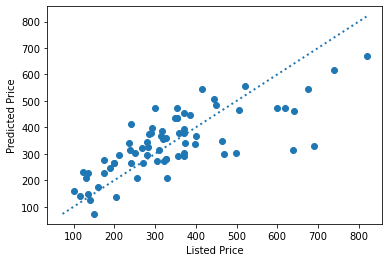

In [7]:
# Diagnostics

print('R^2                : %f' % metrics.r2_score(y_true = y, y_pred = predicted))
print('MSE                : %f' % metrics.mean_squared_error(y_true = y, y_pred = predicted))
print('sqrt(MSE)          : %f' % np.sqrt(metrics.mean_squared_error(y_true = y, y_pred = predicted)))

y_min = predicted.min()

if y.min() < y_min:
    y_min = y.min()
    
y_max = predicted.max()
if y.max() > y_max:
    y_max = y.max()

plt.scatter(x=y,y=predicted)
plt.xlabel('Listed Price')
plt.ylabel('Predicted Price')
plt.plot([y_min,y_max],[y_min,y_max],linewidth = '2', linestyle='dotted')

In [8]:
# Save model to disk

model_file = os.path.join(model_dir,'model.pkl')

with open(model_file,'wb') as f:
    pickle.dump(model,f)

In [9]:
with open(model_file,'rb') as f:
    model_saved = pickle.load(f)

In [10]:
# Check model saved correctly

model_saved.predict(X) - predicted

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [11]:
type(X[0]), X[0].shape, X[0]


(numpy.ndarray, (4,), array([  2.6,  12. , 900. ,  32. ]))

In [12]:
# API Call Testing

x1 = float('2.60') #speed
x2 = float('12') #cores
x3 = float('240') #storage
x4 = float('64') #ram

x = np.array([x1,x2,x3,x4]).reshape(1,-1)
type(x), x.shape, x, model_saved.predict(x)

(numpy.ndarray,
 (1, 4),
 array([[  2.6,  12. , 240. ,  64. ]]),
 array([[361.75595246]]))

In [13]:
y

array([[234.99],
       [173.95],
       [124.16],
       [320.95],
       [353.56],
       [159.99],
       [314.95],
       [140.22],
       [238.16],
       [299.99],
       [415.31],
       [239.99],
       [354.95],
       [199.99],
       [315.99],
       [310.95],
       [397.55],
       [370.95],
       [266.95],
       [354.95],
       [249.99],
       [239.99],
       [349.99],
       [283.95],
       [280.95],
       [369.99],
       [325.81],
       [468.93],
       [279.99],
       [136.03],
       [690.2 ],
       [637.42],
       [355.95],
       [359.99],
       [445.95],
       [369.99],
       [519.99],
       [372.51],
       [506.49],
       [639.99],
       [676.61],
       [620.17],
       [325.81],
       [285.95],
       [189.99],
       [386.96],
       [599.  ],
       [499.  ],
       [199.99],
       [330.  ],
       [304.95],
       [173.95],
       [289.99],
       [129.99],
       [319.99],
       [211.96],
       [100.47],
       [149.99],
       [269.99

In [14]:
model_saved.predict(x).item(0)

361.755952464189